# Times series visualizer

### Importando librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ManuelKlug\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Leyendo el Dataset y características más importantes

In [2]:
df = pd.read_csv("data/fcc-forum-pageviews.csv", index_col="date", parse_dates=["date"])

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [5]:
df.columns

Index(['value'], dtype='object')

In [6]:
df.shape

(1304, 1)

### Cleaning data

Lo que se intenta es que el DataFrame esté conformado por valores que se encuentren:

en el 2.5% del inicio del dataset (primeros valores),

o en el 97.5% del final del dataset (últimos valores).

In [7]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & 
        (df['value'] <= df['value'].quantile(0.975))]

In [8]:
df.shape

(1238, 1)

In [9]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Line chart

Muestra la variación de visualizaciones del foro de freeCodeCamp desde el 5/2016 al 12/2019

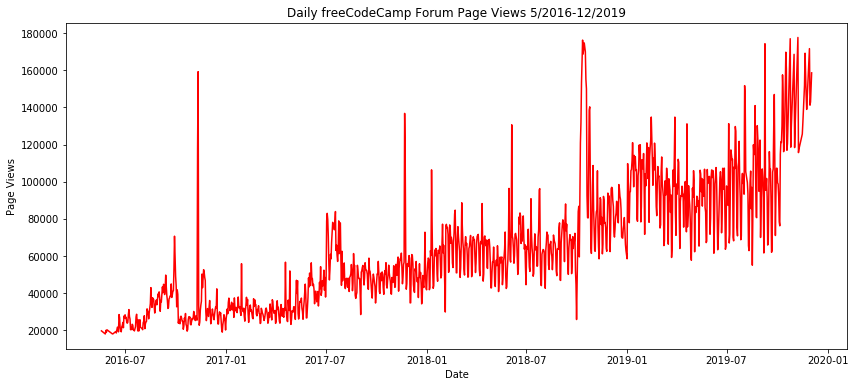

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df.index, df["value"], color="r")

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

fig.savefig("images/line_plot.png", dpi=300)

### Bar plot

Lo que se busca con este bar plot es visualizar el promedio de visitas a la página por cada mes de cada año.

#### Trabajando sobre el DataFrame

In [11]:
df_bar = df.copy()

df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month

In [12]:
df_bar = df_bar.groupby(["year", "month"]).mean()

In [13]:
df_bar.head()

value
year month              
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667

#### Realizando el gráfico

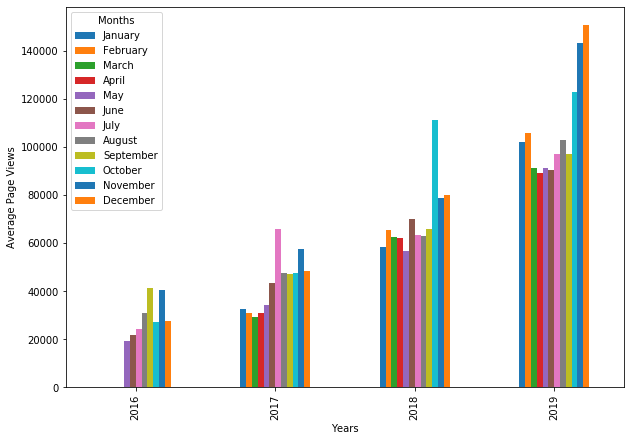

In [14]:
months = ["January", "February", "March", "April",  "May", "June", 
          "July", "August", "September", "October", "November", "December"]

fig2, ax2 = plt.subplots(figsize=(10, 7))

df_bar.unstack().plot(kind="bar", ax=ax2)

ax2.legend(title="Months", labels=months)

ax2.set_xlabel("Years")
ax2.set_ylabel("Average Page Views")

fig2.savefig("images/bar_plot.png")

### Box plot

#### Trabajando sobre el DataFrame

In [15]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = df_box["date"].dt.year
df_box["month"] = df_box["date"].dt.strftime('%b')

In [16]:
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


In [17]:
filt_2017_2018 = df_box.loc[~df_box.year.isin([2016, 2019])]

In [18]:
filt_2017_2018

,date,value,year,month
205,2017-01-01,26185,2017,Jan
206,2017-01-02,28560,2017,Jan
207,2017-01-03,31525,2017,Jan
208,2017-01-04,28955,2017,Jan
209,2017-01-05,35024,2017,Jan
...,...,...,...,...
927,2018-12-27,80703,2018,Dec
928,2018-12-28,73629,2018,Dec
929,2018-12-29,66282,2018,Dec
930,2018-12-30,62826,2018,Dec


#### Realizando el gráfico

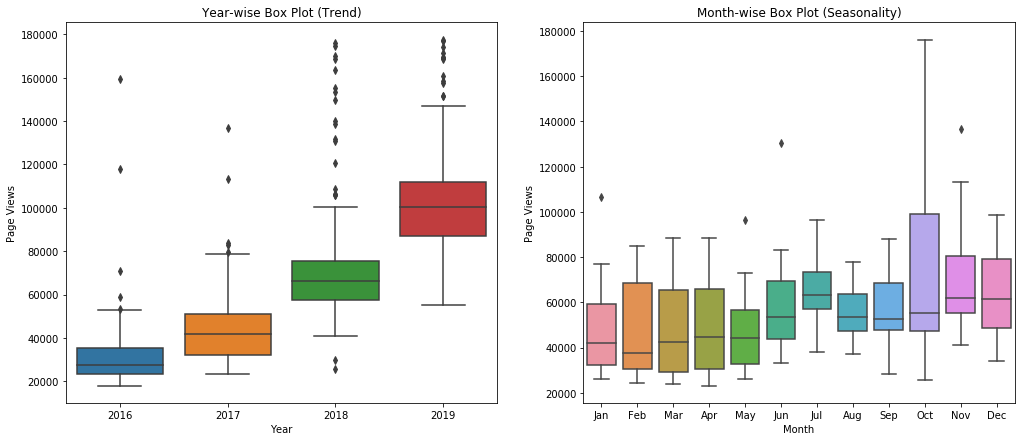

In [19]:
fig3, axes3 = plt.subplots(1, 2, figsize=(17, 7))

# Axis 1
sns.boxplot(x="year", y="value", data=df_box, ax=axes3[0])

axes3[0].set_title("Year-wise Box Plot (Trend)")
axes3[0].set_xlabel("Year")
axes3[0].set_ylabel("Page Views")

# Axis 2
sns.boxplot(x="month", y="value", data=filt_2017_2018, ax=axes3[1])

axes3[1].set_title("Month-wise Box Plot (Seasonality)")
axes3[1].set_xlabel("Month")
axes3[1].set_ylabel("Page Views")

fig3.savefig("images/box_plot.png")